In [1]:
# import relevant Libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from skimpy import skim

In [107]:
#IMPORT TRAIN DATASET
train =  pd.read_csv('Train.csv')

#IMPORT TEST DATASET
test =  pd.read_csv('Test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [108]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


#### DATE 

- Convert to valid type 
- CHECK YEAR TO ENSURE VALIDITY
- FIND MISSING YEAR
    - FILL OR DROP MISSING DATES 

<AxesSubplot:>

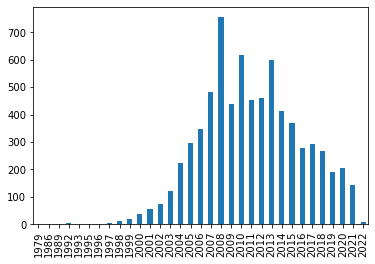

In [109]:
# CLEAN YEAR COLUMN AND 

train.Year = train.Year.str.replace(',','')
train.Year.value_counts().sort_index().plot(kind = 'bar')


In [110]:
from random import randint

# select the 5% and 95%
a = train.Year[train.Year.notna()].astype(int).quantile(0.05)
b = train.Year[train.Year.notna()].astype(int).quantile(0.95)
c = train.Year[train.Year.notna()].astype(int).mean()

randYear = lambda x : randint(a,b)

## FILL NA VALUE WITH RANDOM YEAR IN THE 5% and 95% PERCENTILE
train.Year[train.Year.isna()] = train.Year[train.Year.isna()].apply(randYear)

## CONVERT COLUMN TO INTEGER
train.Year = train.Year.astype(float)

C:\Users\Owner\AppData\Local\Temp/ipykernel_10732/3944539053.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Year[train.Year.isna()] = train.Year[train.Year.isna()].apply(randYear)


#### CLEANING DISTANCE COLUMN
- CLEANING STRING AND FILE TYPE CONVERSION

In [111]:
# CLEAN YEAR COLUMN AND 
train.Distance = train.Distance.str.replace(',','')
train.Distance = train.Distance.astype(float)

In [112]:
# rename amount Column
train.rename(columns={"Amount (Million Naira)": "Amount"}, inplace = True)


# OPTION 1 
- using linear regression fill missing distances 

## DROP COLUMNS
- Drop Vechile ID and Colour

In [8]:
train1 = train.copy()
train1.drop(columns=['VehicleID', 'Colour'], inplace = True)

<AxesSubplot:>

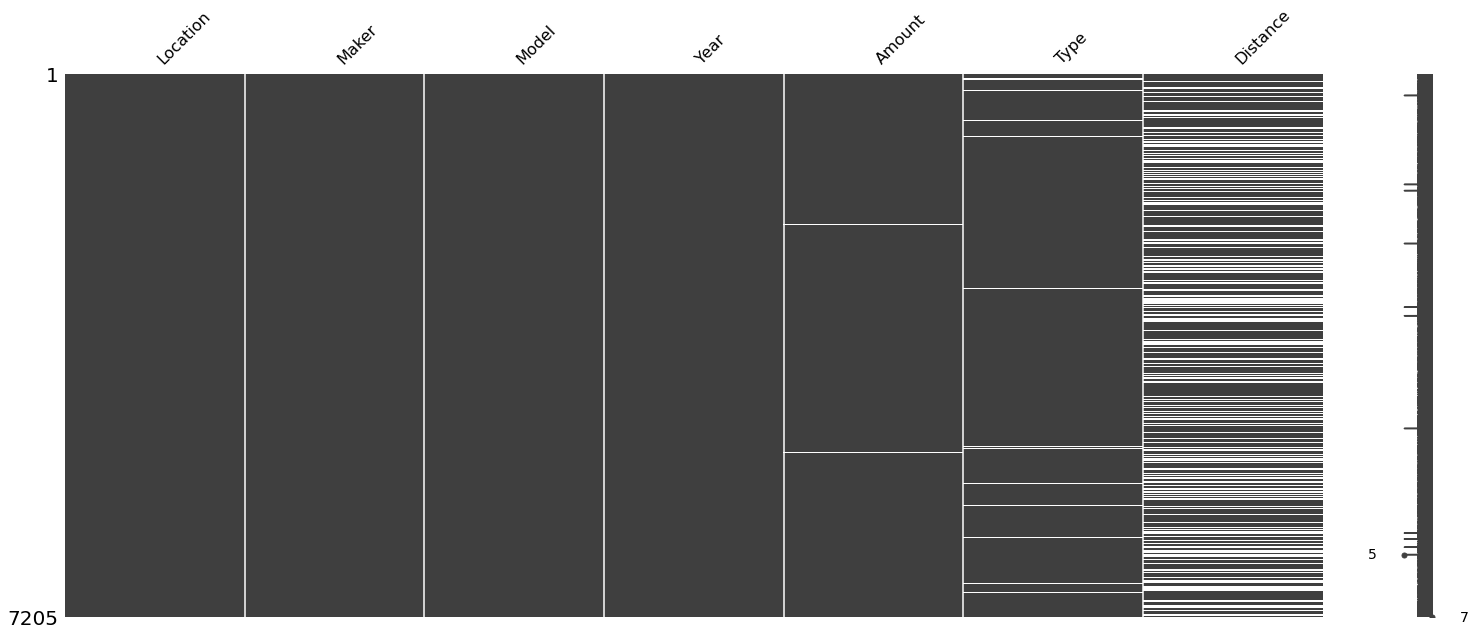

In [9]:
# View distribution of missing values
missingno.matrix(train1)

In [10]:
#sort missing values by categories 
train1.sort_values(by = ['Location', 'Maker', 'Model', 'Year', 'Type' ], inplace = True)
train1.reset_index(drop =True , inplace = True)

In [11]:
## fill Type Colums

def defineType(row):
    
    from random import choice

    if row['Location'] == 'Abuja':
        
        if (row['Distance']  > 0) & (row['Distance']  < 20000):
            return 'Brand New'
        elif (row['Distance']  > 20000) & (row['Distance']  < 50000) :
            return 'Foreign Used'
        elif (row['Distance']  > 50000) & (row['Distance']  < 100000): 
            return choice(['Brand New', 'Foreign Used'])
        else:
            return 'Foreign Used'
        
    elif row['Location'] == 'Lagos':
    
        if (row['Distance']  > 0) & (row['Distance']  < 20000):
            return 'Brand New'
        elif (row['Distance']  > 20000) & (row['Distance']  < 90000) :
            return 'Foreign Used'
        elif (row['Distance']  > 90000) & (row['Distance']  < 140000): 
            return choice(['Brand New', 'Foreign Used'])
        else:
            return 'Foreign Used'
        
    elif row['Location'] == 'Ibadan':
    
         if (row['Distance']  > 0) & (row['Distance']  < 20000):
             return 'Brand New'
         elif (row['Distance']  > 20000) & (row['Distance']  < 100000) :
             return 'Foreign Used'
         elif (row['Distance']  > 100000) & (row['Distance']  < 140000): 
             return choice(['Brand New', 'Foreign Used'])
         else:
             return 'Foreign Used'

In [12]:
train1.Type[train1.Type.isna()] = train1[train1.Type.isna()].apply(defineType, axis =1)


C:\Users\Owner\AppData\Local\Temp/ipykernel_10732/3627145900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.Type[train1.Type.isna()] = train1[train1.Type.isna()].apply(defineType, axis =1)


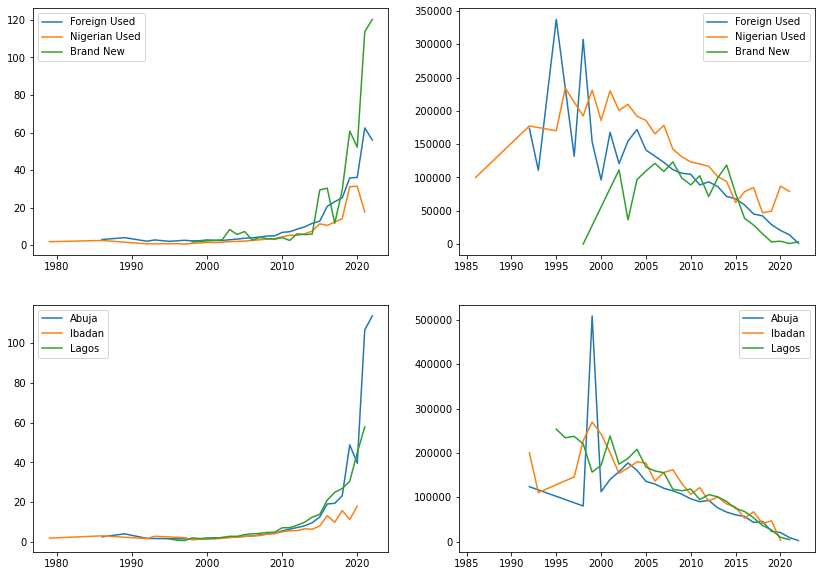

In [13]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig, ((ax1, ax2), (ax3, ax4)) = plot_objects



for i in train1.Type.unique():
    
    ax1.plot(train1[train1.Type == i].groupby('Year').agg({'Amount' : 'mean'}))
    ax2.plot(train1[train1.Type == i].groupby('Year').agg({'Distance' : 'mean'}))
 
    
for i in train1.Location.unique():
    
    ax3.plot(train1[train1.Location == i].groupby('Year').agg({'Amount' : 'mean'}))
    ax4.plot(train1[train1.Location == i].groupby('Year').agg({'Distance' : 'mean'}))
    
    
ax1.legend(train1.Type.unique())
#ax1.title('Price Distribution by Year and Type')

ax2.legend(train1.Type.unique())
#ax2.title('Distance Distribution by Year and Type')

ax3.legend(train1.Location.unique())
#ax3.title('Price Distribution by Year and Location')

ax4.legend(train1.Location.unique())
#ax2.title('Distance Distribution by Year and Location')

<AxesSubplot:xlabel='Type', ylabel='Distance'>

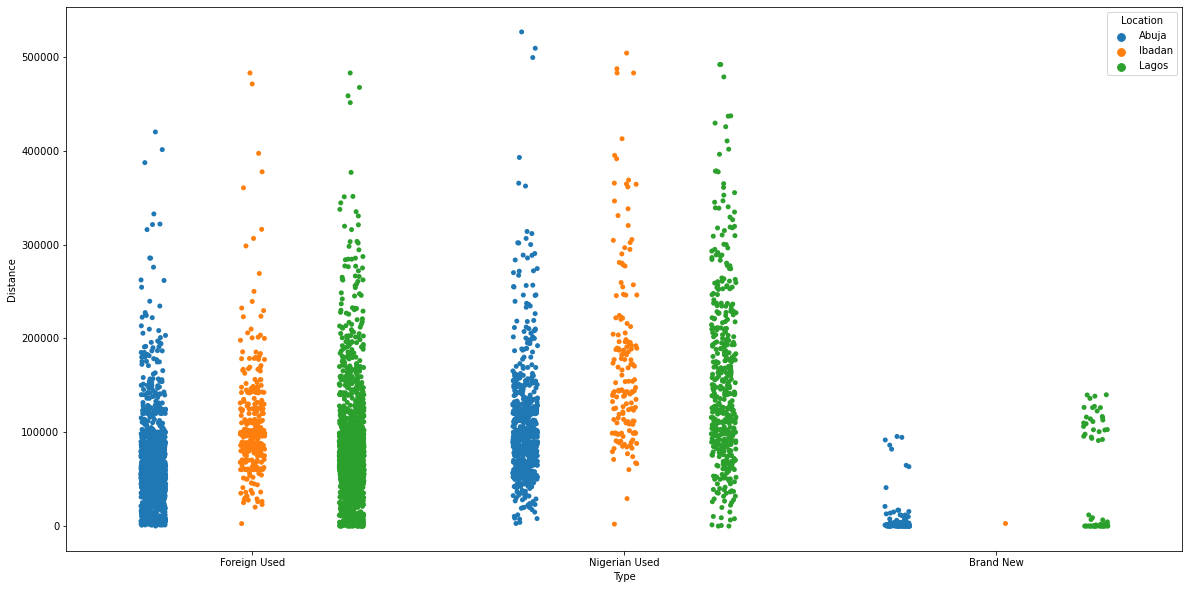

In [14]:
##create a list of verified values of type and distance
typexDis_noNull = train1[['Type', 'Distance','Location']][(train1.Type.notna()) & (train1.Distance.notna())]

f, ax = plt.subplots(figsize=(20, 10))
#sns.violinplot(data = typexDis_noNull[typexDis_noNull.Distance < 600000], x='Type', y = 'Distance', hue = 'Location', dodge=True )
sns.stripplot(data = typexDis_noNull[typexDis_noNull.Distance < 600000], x='Type', y = 'Distance', hue = 'Location', dodge=True )

In [15]:
#FILL MISSING AMOUNTS WITH 'FFILL'
train1.Amount.fillna(method= 'pad', inplace=True)

# TEST
a1_test = train1[train1.Distance.isna()].drop(columns= ['Model', 'Distance', 'Maker'])

#TRAIN
a1_train = train1[~train1.Distance.isna()].drop(columns= ['Model', 'Maker'])
a1_trainTarget = a1_train.Distance
a1_train.drop(columns= 'Distance', inplace= True)

#CONVERT TO MACHINE READABLE
a1_train = pd.get_dummies(a1_train)
a1_test  = pd.get_dummies(a1_test)


#EVAL DISTANCE USING RANDOM FOR ATTAINING MISSING DISTANCE
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()

#Train Model
model.fit(a1_train, a1_trainTarget)

# Make PREDICTIONS 
model.predict(a1_test)
train1.Distance[train1.Distance.isna()] = model.predict(a1_test)


C:\Users\Owner\AppData\Local\Temp/ipykernel_10732/1177045787.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.Distance[train1.Distance.isna()] = model.predict(a1_test)


<AxesSubplot:>

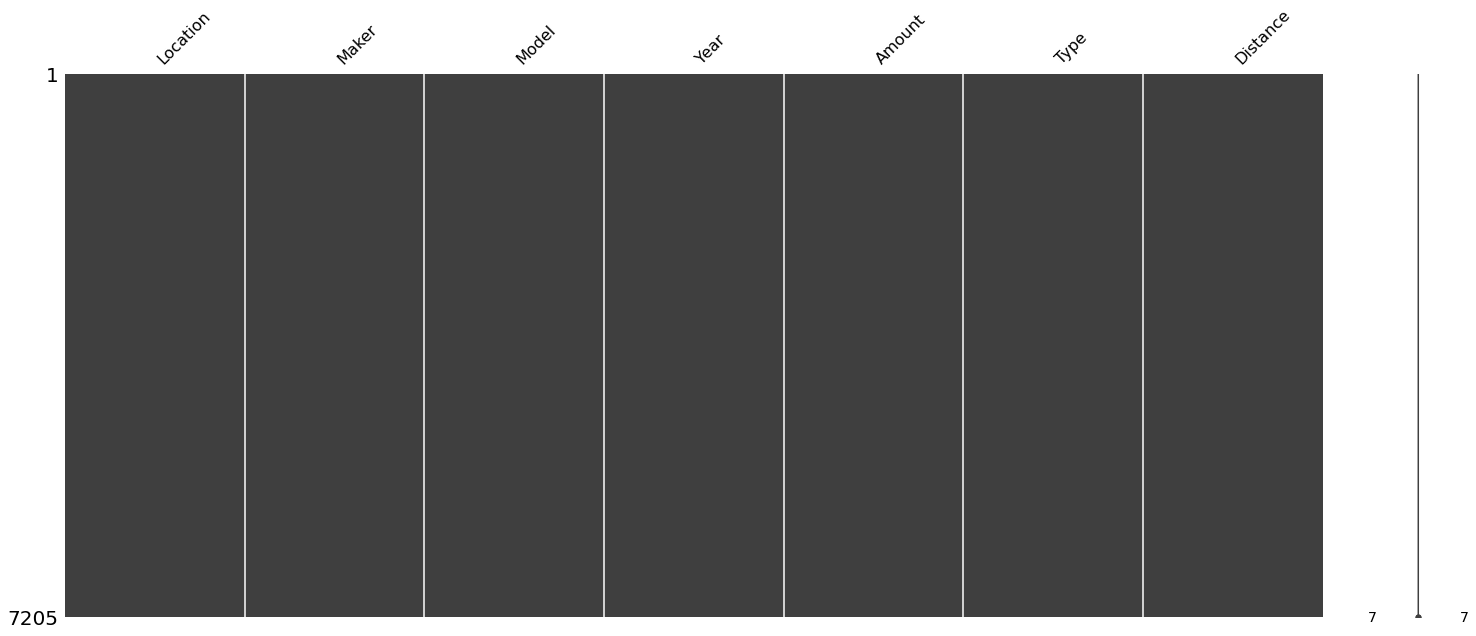

In [16]:
missingno.matrix(train1)

### CLEANING TEST DATA 

<AxesSubplot:>

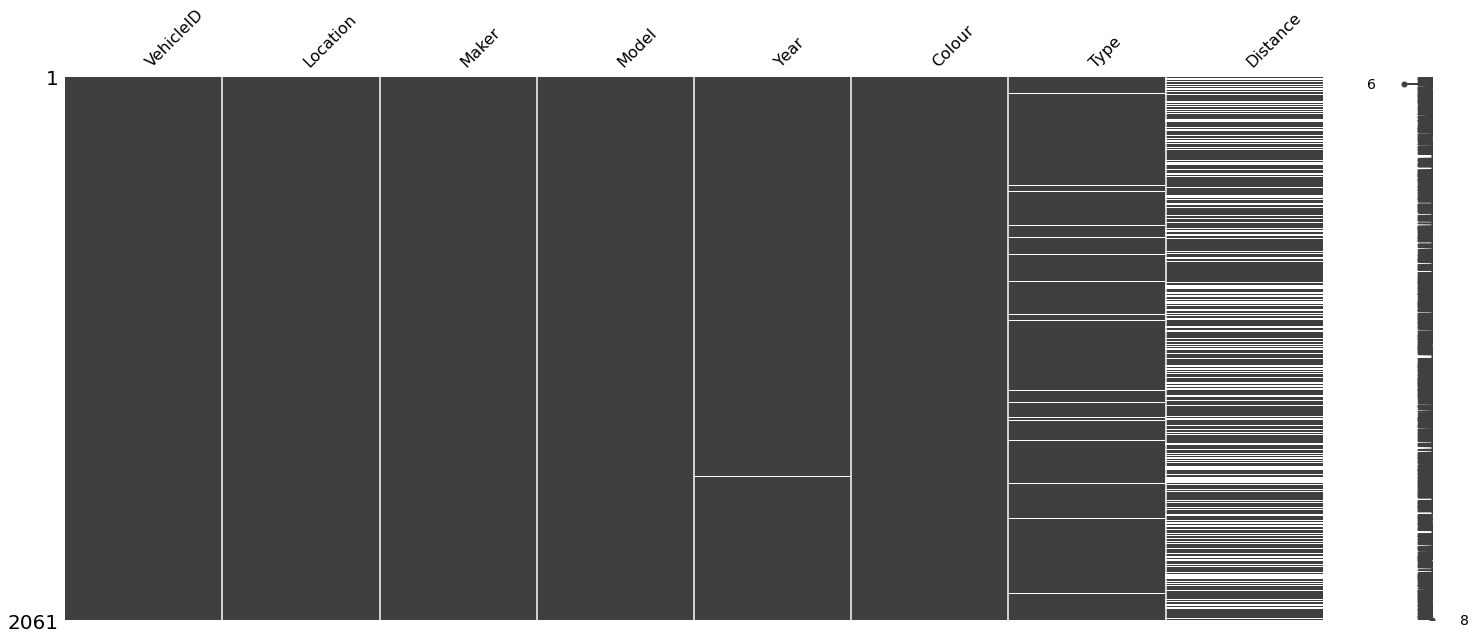

In [17]:
test.Year = test.Year.str.replace(',','')


test1 = test.copy()
missingno.matrix(test1)

In [18]:
test1.head(3)

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,2008,White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,2013,White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,2005,Gold,Foreign Used,NaN


### CLEAN YEAR COLUMN
- CLEAN YEAR AND CONVERT TO APPOPRIATE FORMAT(INT)

In [19]:
#count number of missing year
len(test1.Year[test1.Year.isna()])

2

In [20]:
# since there are mjust a few missing years(2), lets fill this years with the mean
test1.Year[test1.Year.isna()] = int(test1.Year[test1.Year.notna()].astype(int).mean())

#Convert the Year column to strings
test1.Year = test1.Year.astype(int)

C:\Users\Owner\AppData\Local\Temp/ipykernel_10732/3495488545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1.Year[test1.Year.isna()] = int(test1.Year[test1.Year.notna()].astype(int).mean())


In [21]:
#Fill Type Column
test1.Type[test1.Type.isna()] = test1[test1.Type.isna()].apply(defineType, axis =1)

C:\Users\Owner\AppData\Local\Temp/ipykernel_10732/1132138125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1.Type[test1.Type.isna()] = test1[test1.Type.isna()].apply(defineType, axis =1)


In [22]:
# TEST
a2_test = test1[test1.Distance.isna()].drop(columns= ['VehicleID','Model', 'Distance', 'Maker', 'Colour'])

#TRAIN
a2_train       = test1[~test1.Distance.isna()].drop(columns= ['VehicleID','Model', 'Maker', 'Colour'])
a2_trainTarget = a2_train.Distance
a2_train.drop(columns= 'Distance', inplace= True)

#CONVERT TO MACHINE READABLE
a2_train = pd.get_dummies(a2_train)
a2_test  = pd.get_dummies(a2_test)


#EVAL DISTANCE USING RANDOM FOR ATTAINING MISSING DISTANCE
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

#Train Model
model.fit(a2_train, a2_trainTarget)

# Make PREDICTIONS 
model.predict(a2_test)
test1.Distance[test1.Distance.isna()] = model.predict(a2_test)


C:\Users\Owner\AppData\Local\Temp/ipykernel_10732/1548951263.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1.Distance[test1.Distance.isna()] = model.predict(a2_test)


In [409]:
# IMPLEMENT 
x = pd.get_dummies(train1.drop(columns =['Amount', "Model"]))
y = train1.Amount


Vehicle = test1.VehicleID
x_test = pd.get_dummies(test1.drop(columns = ['VehicleID', 'Colour', 'Model']))

for col in x.columns:
    if col not in x_test.columns:
        x_test[col] = 0
        
for col in x_test.columns:
    if col not in x.columns:
        x[col] = 0


from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

#Train Model
model.fit(x, y)

# Make PREDICTIONS 
prices = model.predict(x_test)

#SAEV AS FILE
pd.DataFrame({'VehicleID' : Vehicle , 'Amount (Million Naira)' : prices}).to_csv('Submissionknn.csv', index =- False)

In [408]:
y

0        4.50
1        7.00
2        7.50
3        5.00
4       12.00
        ...  
7200     2.25
7201     7.85
7202     2.59
7203     3.04
7204     3.04
Name: Amount, Length: 7205, dtype: float64

# OPTION 2
- using ffill to fill nulls

In [24]:
train2 = train.copy()
test2  = test.copy()

In [25]:
#DROP IRRELEVENT COLUMNS 
train2.drop(columns = ['Colour', 'VehicleID'], inplace = True)
test2.drop(columns = 'Colour' , inplace = True)

#FIX TRAINING DATASET VALUES 
train2.sort_values(by = ['Location', 'Maker', 'Model', 'Year', 'Type' ], inplace = True)
train2.reset_index(drop =True , inplace = True)

# fill Null values With preceedig values values 
train2.fillna(method = 'pad', inplace = True)
train2.fillna(method = 'bfill', inplace =  True)

In [26]:
test2.Year[test2.Year.isna()] = int(test2.Year[test2.Year.notna()].astype(int).mean())

#Convert the Year column to strings
test2.Year = test2.Year.astype(int)


# FIX TESTING DATASET
test2.sort_values(by = ['Location', 'Maker', 'Model', 'Year', 'Type' ], inplace = True)
test2.reset_index(drop =True , inplace = True)

# fill Null values With preceedig values values 
test2.fillna(method = 'pad', inplace = True)
test2.fillna(method = 'bfill', inplace =  True)


C:\Users\Owner\AppData\Local\Temp/ipykernel_10732/3696937306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.Year[test2.Year.isna()] = int(test2.Year[test2.Year.notna()].astype(int).mean())


In [27]:
# IMPLEMENT 
x = pd.get_dummies(train2.drop(columns =['Amount', "Model"]))
y = train2.Amount


Vehicle = test2.VehicleID
x_test = pd.get_dummies(test2.drop(columns = ['VehicleID', 'Model']))

for col in x.columns:
    if col not in x_test.columns:
        x_test[col] = 0
        
for col in x_test.columns:
    if col not in x.columns:
        x[col] = 0

#EVAL DISTANCE USING RANDOM FOR ATTAINING MISSING DISTANCE
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()

#Train Model
model.fit(x, y)

# Make PREDICTIONS 
prices = model.predict(x_test)

#SAEV AS FILE
pd.DataFrame({'VehicleID' : Vehicle , 'Amount (Million Naira)' : prices}).to_csv('Submission_ffill.csv', index =- False)

# OPTION 3
- Drop Distance Columns in both 

In [28]:
# IMPLEMENT 
x = pd.get_dummies(train1.drop(columns =['Amount', 'Distance']))
y = train1.Amount


Vehicle = test1.VehicleID
x_test = pd.get_dummies(test1.drop(columns = ['VehicleID', 'Colour', 'Distance']))

for col in x.columns:
    if col not in x_test.columns:
        x_test[col] = 0
        
for col in x_test.columns:
    if col not in x.columns:
        x[col] = 0

#EVAL DISTANCE USING RANDOM FOR ATTAINING MISSING DISTANCE
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()

#Train Model
model.fit(x, y)

# Make PREDICTIONS 
prices = model.predict(x_test)

#SAEV AS FILE
pd.DataFrame({'VehicleID' : Vehicle , 'Amount (Million Naira)' : prices}).to_csv('Submissiondrop Distance.csv', index =- False)

C:\Users\Owner\AppData\Local\Temp/ipykernel_10732/671901937.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0
C:\Users\Owner\AppData\Local\Temp/ipykernel_10732/671901937.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x[col] = 0


# OPTION 4
-  CHRISTAINS COPY

In [475]:
train4 = train.copy()
test4  = test.copy() 
train4.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount,Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.0,Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,2012.0,Silver,3.5,Nigerian Used,125000.0
2,VHL19499,Lagos,Lexus,RX 350,2010.0,Red,9.2,Foreign Used,110852.0
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.0,Blue,22.8,Foreign Used,30000.0
4,VHL12170,Ibadan,Toyota,Highlander,2002.0,Red,2.6,Nigerian Used,125206.0


In [476]:
# NB - Year had alreay been filled with random years in the 5th to 95th percentile of the distribution

# next is to convert the year column to data, in my opiniion, this dosent look very important
#train4 = train4['Year'] = pd.to_datetime(train4['Year'])
#train4['Year'] = pd.DatetimeIndex(train4['Year']).year

In [477]:
train4['Year'] =  train4['Year'].astype(int)

def fillamt(input_df, col = 'Amount' , choice='mean' ):
    # your code here
    output_df = input_df
    
    meaner   = output_df.groupby(['Model','Year'])[col].mean()
    medianer = output_df.groupby(['Model','Year'])[col].median()
    
    def fill_missing_mean(row):
        if pd.isnull(row[col]):
            return meaner[row['Model'],row['Year']]
        else:
            return row[col]
        
    def fill_missing_median(row):
        if pd.isnull(row[col]):
            return medianer[row['Model'],row['Year']]
        else:
            return row[col]
    
    if choice == 'mean':
        output_df[col] = output_df.apply(fill_missing_mean, axis=1)
        
    elif choice == 'median':
        output_df[col] = output_df.apply(fill_missing_median, axis=1)
        
    return output_df


def filldist(input_df, col = 'Distance' , choice='mean' ):
    # your code here
    output_df = input_df
    
    meaner   = output_df.groupby(['Year','Type'])[col].mean()
    medianer = output_df.groupby(['Year','Type'])[col].median()
    
    def fill_missing_mean(row):
        if pd.isnull(row[col]):
            return meaner[row['Year'],row['Type']]
        else:
            return row[col]
        
    def fill_missing_median(row):
        if pd.isnull(row[col]):
            return medianer[row['Year'],row['Type']]
        else:
            return row[col]
    
    if choice == 'mean':
        output_df[col] = output_df.apply(fill_missing_mean, axis=1)
        
    elif choice == 'median':
        output_df[col] = output_df.apply(fill_missing_median, axis=1)
        
    return output_df

In [478]:
#fil the Amount Column
train4 = fillamt(train4, 'Amount', choice='median')

# Fill Type column
train4.Type[train4.Type.isna()] = train4[train4.Type.isna()].apply(defineType, axis =1)

#fill Distance column
train4 = filldist(train4, 'Distance', choice='median')

C:\Users\Owner\AppData\Local\Temp/ipykernel_10732/293284537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4.Type[train4.Type.isna()] = train4[train4.Type.isna()].apply(defineType, axis =1)


In [479]:
train4.isna().sum()

VehicleID    0
Location     0
Maker        0
Model        0
Year         0
Colour       0
Amount       5
Type         0
Distance     3
dtype: int64

In [480]:
#fill up the remainder with the mean
train4['Amount']   = train4['Amount'].fillna((train4['Amount'].mean()))
train4['Distance'] = train4['Distance'].fillna((train4['Distance'].mean()))

In [481]:
#Drop VECHIILEID column

traindemo = train4.drop(columns=['VehicleID','Colour'])

for col in traindemo.columns:
    if traindemo[col].dtype == 'object':
        traindemo[col] = traindemo[col].astype('category').cat.codes 
        print('CORRELATION BTW Amount and ', col)
        print(traindemo[['Amount', col]].corr().Amount)
        print()

#import seaborn as sns
#sns.heatmap(traindemo.corr())

traindemo.corr().Amount.sort_values()

CORRELATION BTW Amount and  Location
Amount      1.000000
Location   -0.078426
Name: Amount, dtype: float64

CORRELATION BTW Amount and  Maker
Amount    1.000000
Maker    -0.047972
Name: Amount, dtype: float64

CORRELATION BTW Amount and  Model
Amount    1.000000
Model     0.085034
Name: Amount, dtype: float64

CORRELATION BTW Amount and  Type
Amount    1.00000
Type     -0.32822
Name: Amount, dtype: float64



Type       -0.328220
Distance   -0.208339
Location   -0.078426
Maker      -0.047972
Model       0.085034
Year        0.452134
Amount      1.000000
Name: Amount, dtype: float64

In [482]:
traindemo.Type  = train4.Type

#Absorb the coding convenctions 
maker     = pd.concat([train4.Maker, traindemo.Maker],       axis=1,  keys=['A', 'B']).drop_duplicates().reset_index(drop= True)
model     = pd.concat([train4.Model, traindemo.Model],       axis=1,  keys=['A', 'B']).drop_duplicates().reset_index(drop= True)
location  = pd.concat([train4.Location, traindemo.Location], axis=1,  keys=['A', 'B']).drop_duplicates().reset_index(drop= True)

#Convert to machine readable 
traindemo = pd.get_dummies(traindemo)
traindemo.head()

,Location,Maker,Model,Year,Amount,Distance,Type_Brand New,Type_Foreign Used,Type_Nigerian Used
0,0,17,117,2011,2.2,92828.0,0,0,1
1,1,19,1049,2012,3.5,125000.0,0,0,1
2,2,29,908,2010,9.2,110852.0,0,1,0
3,0,34,508,2017,22.8,30000.0,0,1,0
4,1,52,569,2002,2.6,125206.0,0,0,1


### CLEANING AND PREPARING TEST DATA 

In [483]:
def cleanDates(var) :
    var = str(var).replace(',','')
    return var

test4.Year = test4.Year.apply(cleanDates)

#CONVERT TO APPRORIATE DATA TYPES 
test4[['Distance', "Year"]] = test4[['Distance', "Year"]].astype(float)

In [484]:
test4.isna().sum()

VehicleID      0
Location       0
Maker          0
Model          0
Year           2
Colour         0
Type          54
Distance     676
dtype: int64

In [485]:
#fill Missing YEAR
test4.Year.fillna(int(test4.Year.mean()), inplace =  True)

In [486]:
test4.isna().sum()

VehicleID      0
Location       0
Maker          0
Model          0
Year           0
Colour         0
Type          54
Distance     676
dtype: int64

In [487]:
# Fill Type column
test4.Type[test4.Type.isna()] = test4[test4.Type.isna()].apply(defineType, axis =1)

C:\Users\Owner\AppData\Local\Temp/ipykernel_10732/3482021420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test4.Type[test4.Type.isna()] = test4[test4.Type.isna()].apply(defineType, axis =1)


In [488]:
test4 = filldist(test4, 'Distance', choice='median')

#test4['Distance'] = test4['Distance'].fillna((test4['Distance'].mean()))

#### FEATURE ENGR  OF TEST DATA 

In [489]:
location_dict = {}
for i in range(len(location)):
    location_dict[location.A.iloc[i]] = location.B.iloc[i]

model_dict = {}
for i in range(len(model)):
    model_dict[model.A.iloc[i]] = model.B.iloc[i]

maker_dict = {}
for i in range(len(maker)):
    maker_dict[maker.A.iloc[i]] = maker.B.iloc[i]


In [490]:
# Map element encoding 
test4['Location'] = test4['Location'].map(location_dict)
test4['Maker']    = test4['Maker'].map(maker_dict)
 

In [491]:
vechile = test4['VehicleID']
test4.drop(columns=['VehicleID','Colour','Model'], inplace= True)

In [492]:
print(traindemo.info())
test4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            7205 non-null   int8   
 1   Maker               7205 non-null   int8   
 2   Model               7205 non-null   int16  
 3   Year                7205 non-null   int32  
 4   Amount              7205 non-null   float64
 5   Distance            7205 non-null   float64
 6   Type_Brand New      7205 non-null   uint8  
 7   Type_Foreign Used   7205 non-null   uint8  
 8   Type_Nigerian Used  7205 non-null   uint8  
dtypes: float64(2), int16(1), int32(1), int8(2), uint8(3)
memory usage: 190.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  2061 non-null   int8   
 1   Maker     2060 non-null   float64
 2   Ye

In [493]:
test4.Maker.fillna(test4.Maker.median(), inplace  = True)
test4.Distance.fillna(test4.Distance.mean, inplace = True )
# Convert to apporraite datatypes 
test4[['Year', 'Maker']]  = test4[['Year', 'Maker']].astype(int)
test4['Distance']  = test4['Distance'].astype(float)


TypeError: float() argument must be a string or a number, not 'method'

In [ ]:
# Convert to 
test4 = pd.get_dummies(test4)
test4.head()


,Location,Maker,Year,Distance,Type_Brand New,Type_Foreign Used,Type_Nigerian Used
0,0,3,2008,30524.0,0,1,0
1,2,52,2013,69082.0,0,1,0
2,2,52,2005,85880.0,0,1,0
3,2,52,2011,166839.0,0,1,0
4,2,29,2013,88862.0,0,1,0


In [ ]:
traindemo.head()

,Location,Maker,Model,Year,Amount,Distance,Type_Brand New,Type_Foreign Used,Type_Nigerian Used
0,0,17,117,2011,2.2,92828.0,0,0,1
1,1,19,1049,2012,3.5,125000.0,0,0,1
2,2,29,908,2010,9.2,110852.0,0,1,0
3,0,34,508,2017,22.8,30000.0,0,1,0
4,1,52,569,2002,2.6,125206.0,0,0,1


#### APPLYING MACHINE LEARNING MODELS 



In [ ]:
X = traindemo.drop(columns = 'Amount')
Y = traindemo.Amount

In [ ]:
#EVAL DISTANCE USING RANDOM FOR ATTAINING MISSING DISTANCE
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

#Train Model
model.fit(X, Y)

# Make PREDICTIONS 
prices = model.predict(test4)

#SAEV AS FILE
pd.DataFrame({'VehicleID' : vechile , 'Amount (Million Naira)' : prices}).to_csv('christain + randomforest.csv', index =- False)

TypeError: float() argument must be a string or a number, not 'method'

In [ ]:
#EVAL DISTANCE USING RANDOM FOR ATTAINING MISSING DISTANCE
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators = 25)


#Train Model
model.fit(X, Y)

# Make PREDICTIONS 
prices = model.predict(test4)

#SAEV AS FILE
pd.DataFrame({'VehicleID' : vechile , 'Amount (Million Naira)' : prices}).to_csv('christain + XGB.csv', index =- False)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

model.fit(X, Y)

prices = model.predict(test4)


#SAEV AS FILE
pd.DataFrame({'VehicleID' : vechile , 'Amount (Million Naira)' : prices}).to_csv('christain + KNN.csv', index =- False)
